## 0 전처리

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 8.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b1ec515da9b3a4dcb81b7719a55a7ae65ef0c65a2a1ca32c75ca1267316de29e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0-1. 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[2학기] 2022-1/빅데이터마이닝/소논문/GOMS 데이터/reGP18_2019.csv')

In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.drop(['a140','a141'], axis = 'columns', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8611 entries, 0 to 8610
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   majorcat    8611 non-null   int64  
 1   sex         8611 non-null   int64  
 2   age         8611 non-null   float64
 3   fam03       8611 non-null   int64  
 4   gpa         8611 non-null   float64
 5   loan01      8611 non-null   int64  
 6   lan01       8611 non-null   int64  
 7   lan02       8611 non-null   int64  
 8   lan03       8611 non-null   int64  
 9   licen02     8611 non-null   int64  
 10  period      8611 non-null   int64  
 11  a007a_2018  8611 non-null   int64  
 12  regular     8611 non-null   int64  
 13  com_size    8611 non-null   int64  
 14  com_loc     8611 non-null   int64  
 15  time        8611 non-null   int64  
 16  work04      8611 non-null   int64  
 17  work05      8611 non-null   int64  
 18  payment01   8611 non-null   int64  
 19  payment02   8611 non-null  

In [ ]:
df['target'].value_counts()

0    6862
1    1749
Name: target, dtype: int64

0    6862
1    1749
Name: target, dtype: int64


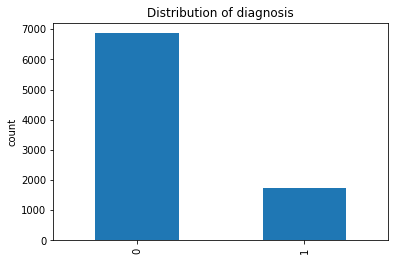

In [ ]:
print(df['target'].value_counts())

df['target'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of diagnosis')
plt.show()

In [ ]:
majorcat = pd.get_dummies(df.majorcat)
majorcat.columns = ['majorcat1','majorcat2','majorcat3','majorcat4','majorcat5','majorcat6','majorcat7']
majorcat

,majorcat1,majorcat2,majorcat3,majorcat4,majorcat5,majorcat6,majorcat7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8606,0,0,0,0,0,0,1
8607,0,0,0,0,0,0,1
8608,0,0,0,0,0,0,1
8609,0,0,0,0,0,0,1


In [ ]:
jobcode = pd.get_dummies(df.a007a_2018)
jobcode.columns = ['jobcode1','jobcode2','jobcode3','jobcode4','jobcode5','jobcode6','jobcode7','jobcode8','jobcode9','jobcode10']
jobcode

,jobcode1,jobcode2,jobcode3,jobcode4,jobcode5,jobcode6,jobcode7,jobcode8,jobcode9,jobcode10
0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8606,0,0,0,0,1,0,0,0,0,0
8607,1,0,0,0,0,0,0,0,0,0
8608,0,0,1,0,0,0,0,0,0,0
8609,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[:,:45]

,majorcat,sex,age,fam03,gpa,loan01,lan01,lan02,lan03,licen02,...,a133,a134,a136,a137,a138,a139,a142,a143,a145,a146
0,1,0,21.750000,0,4.100,0,0,0,1,1,...,3,3,3,3,3,3,3,3,6,1
1,1,0,25.250000,0,3.900,0,0,0,1,1,...,2,2,2,3,3,2,2,3,6,3
2,1,0,24.500000,0,3.800,0,0,0,0,2,...,5,5,4,3,5,4,3,2,6,5
3,1,0,26.000000,0,3.900,0,1,0,1,2,...,4,4,3,2,1,4,2,3,6,1
4,1,1,25.083333,0,3.375,0,1,0,0,0,...,2,2,3,3,4,3,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,7,0,28.333333,0,3.200,1,0,0,0,0,...,4,3,4,4,4,3,3,3,4,3
8607,7,1,25.833333,0,4.300,0,0,0,0,0,...,5,5,5,5,5,5,3,3,6,1
8608,7,1,24.000000,0,3.600,0,0,0,0,0,...,2,3,4,4,4,4,2,2,6,4
8609,7,1,25.833333,0,3.300,0,1,0,0,0,...,4,4,5,4,4,4,3,3,6,3


In [ ]:
raw_df = df
df = pd.concat([raw_df.iloc[:,1:45], majorcat], axis = 1)
df = pd.concat([df, jobcode], axis = 1)
df = df.drop(['a007a_2018'], axis = 1)
df = pd.concat([df, raw_df.iloc[:,-1]], axis = 1)

### 0-2. 평가함수

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

def get_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도: {0: .3f}, 정밀도: {1: .3f}, 재현율: {2: .3f}, F1: {3: .3f}, AUC: {4: .3f}'.format(accuracy, precision, recall, f1, roc_auc))

## 1 over sampling

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :60] 
y = df.iloc[:, -1]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)

### 1-0. 기본모델

#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=60)  
tree.fit(X_train, y_train) 
print("-----학습용-----")
pred = tree.predict(X_train)
get_eval(y_train, pred, pred)

print("-----시험용-----")
pred = tree.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4806    0]
 [   0 1221]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1676  380]
 [ 321  207]]
정확도:  0.729, 정밀도:  0.353, 재현율:  0.392, F1:  0.371, AUC:  0.604


#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=60)
forest.fit(X_train, y_train)
print("-----학습용-----")
pred = forest.predict(X_train)
get_eval(y_train, pred, pred)

print("-----시험용-----")
pred = forest.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4806    0]
 [   0 1221]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[2005   51]
 [ 417  111]]
정확도:  0.819, 정밀도:  0.685, 재현율:  0.210, F1:  0.322, AUC:  0.593


####XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_ = XGBClassifier(learning_rate = 0.05)
eval_set = [(X_test, y_test)]
xgb_.fit(X_train, y_train, eval_metric='error', eval_set = eval_set, verbose=True)
w_preds = xgb_.predict(X_test)
w_pred_proba = xgb_.predict_proba(X_test)[:,1]

[0]	validation_0-error:0.183824
[1]	validation_0-error:0.183824
[2]	validation_0-error:0.183824
[3]	validation_0-error:0.183824
[4]	validation_0-error:0.182276
[5]	validation_0-error:0.182276
[6]	validation_0-error:0.183824
[7]	validation_0-error:0.183824
[8]	validation_0-error:0.184211
[9]	validation_0-error:0.184211
[10]	validation_0-error:0.183824
[11]	validation_0-error:0.183824
[12]	validation_0-error:0.183824
[13]	validation_0-error:0.182663
[14]	validation_0-error:0.182663
[15]	validation_0-error:0.18305
[16]	validation_0-error:0.183824
[17]	validation_0-error:0.18305
[18]	validation_0-error:0.183437
[19]	validation_0-error:0.183437
[20]	validation_0-error:0.18305
[21]	validation_0-error:0.18305
[22]	validation_0-error:0.18305
[23]	validation_0-error:0.18305
[24]	validation_0-error:0.182663
[25]	validation_0-error:0.182276
[26]	validation_0-error:0.181889
[27]	validation_0-error:0.181889
[28]	validation_0-error:0.181889
[29]	validation_0-error:0.182276
[30]	validation_0-error:0.

In [ ]:
print("-----학습용-----")
tw_preds = xgb_.predict(X_train)
tw_pred_proba = xgb_.predict_proba(X_train)[:,1]
get_eval(y_train, tw_preds, tw_pred_proba)
print("-----시험용-----")
get_eval(y_test, w_preds, w_pred_proba)

-----학습용-----
오차행렬
[[4694  112]
 [ 936  285]]
정확도:  0.826, 정밀도:  0.718, 재현율:  0.233, F1:  0.352, AUC:  0.818
-----시험용-----
오차행렬
[[2002   54]
 [ 406  122]]
정확도:  0.822, 정밀도:  0.693, 재현율:  0.231, F1:  0.347, AUC:  0.792


#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(learning_Rate=0.05)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 60)

eval_set = [(X_tr,y_tr), (X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, eval_set = eval_set, eval_metric="error",verbose=1)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
w_pred_proba = xgb_.predict_proba(X_test)[:,1]


[1]	training's binary_error: 0.203724	training's binary_logloss: 0.486671	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.476952
[2]	training's binary_error: 0.203724	training's binary_logloss: 0.471174	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.468186
[3]	training's binary_error: 0.203724	training's binary_logloss: 0.459261	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.459647
[4]	training's binary_error: 0.203724	training's binary_logloss: 0.448722	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.454179
[5]	training's binary_error: 0.203724	training's binary_logloss: 0.439167	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.448398
[6]	training's binary_error: 0.203724	training's binary_logloss: 0.430974	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.444981
[7]	training's binary_error: 0.202065	training's binary_logloss: 0.422861	valid_1's binary_error: 0.192371	valid_1's binary_logloss: 0.441059
[8]	tr

In [ ]:
print("-----학습용-----")
tpreds = lgbm_wrapper.predict(X_train)
tpred_proba = lgbm_wrapper.predict_proba(X_train)[:,1]
get_eval(y_train, tpreds, tpred_proba)
print("-----시험용-----")
get_eval(y_test, preds, pred_proba)

-----학습용-----
오차행렬
[[4770   36]
 [ 446  775]]
정확도:  0.920, 정밀도:  0.956, 재현율:  0.635, F1:  0.763, AUC:  0.963
-----시험용-----
오차행렬
[[1951  105]
 [ 370  158]]
정확도:  0.816, 정밀도:  0.601, 재현율:  0.299, F1:  0.399, AUC:  0.778


### 1-1. SMOTE

In [ ]:
from imblearn.over_sampling import *

In [ ]:
pd.Series(y_train).value_counts()

0    4806
1    1221
Name: target, dtype: int64

In [ ]:
over = SMOTE(random_state=60)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (6027, 60) (6027,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (9612, 60) (9612,)
SMOTE 적용 후 레이블 값 분포:
 1    4806
0    4806
Name: target, dtype: int64


##### DecisionTree

In [ ]:
tree = DecisionTreeClassifier(random_state=60)  
tree.fit(X_train_over, y_train_over)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train_over, y_train_over)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.691


In [ ]:
print("-----학습용-----")
pred = tree.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = tree.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4806    0]
 [   0 4806]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1571  485]
 [ 313  215]]
정확도:  0.691, 정밀도:  0.307, 재현율:  0.407, F1:  0.350, AUC:  0.586


##### RandomForest

In [ ]:
forest = RandomForestClassifier(random_state=60 )
forest.fit(X_train_over, y_train_over)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train_over, y_train_over)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.793


In [ ]:
print("-----학습용-----")
pred = forest.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = forest.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4806    0]
 [   0 4806]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1832  224]
 [ 312  216]]
정확도:  0.793, 정밀도:  0.491, 재현율:  0.409, F1:  0.446, AUC:  0.650


##### XGBoost

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_over, y_train_over, test_size = 0.1, random_state = 60)

In [ ]:
xgb_wrapper =  XGBClassifier( learning_rate = 0.05)
xgb_wrapper.fit(X_train_over, y_train_over, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

#학습용데이터
tw_preds = xgb_wrapper.predict(X_train_over)
tw_pred_proba = xgb_wrapper.predict_proba(X_train_over)[:,1]
print("----학습용데이터-----")
get_eval(y_train_over, tw_preds, tw_pred_proba)

#시험용데이터
print("-----시험용데이터-----")
get_eval(y_test, w_preds, w_pred_proba)

----학습용데이터-----
오차행렬
[[4128  678]
 [ 802 4004]]
정확도:  0.846, 정밀도:  0.855, 재현율:  0.833, F1:  0.844, AUC:  0.929
-----시험용데이터-----
오차행렬
[[1739  317]
 [ 260  268]]
정확도:  0.777, 정밀도:  0.458, 재현율:  0.508, F1:  0.482, AUC:  0.764


#### LightGBM

In [ ]:
lgbm_wrapper = LGBMClassifier(learning_Rate=0.05)

evals = [(X_tr,y_tr), (X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, eval_set = evals, eval_metric="error",verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_error: 0.195607	training's binary_logloss: 0.652523	valid_1's binary_error: 0.233888	valid_1's binary_logloss: 0.6581
[2]	training's binary_error: 0.191329	training's binary_logloss: 0.618836	valid_1's binary_error: 0.234927	valid_1's binary_logloss: 0.628674
[3]	training's binary_error: 0.187861	training's binary_logloss: 0.590287	valid_1's binary_error: 0.230769	valid_1's binary_logloss: 0.604244
[4]	training's binary_error: 0.184277	training's binary_logloss: 0.565261	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.581413
[5]	training's binary_error: 0.176994	training's binary_logloss: 0.540888	valid_1's binary_error: 0.224532	valid_1's binary_logloss: 0.561681
[6]	training's binary_error: 0.173526	training's binary_logloss: 0.521201	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.545238
[7]	training's binary_error: 0.167399	training's binary_logloss: 0.503664	valid_1's binary_error: 0.220374	valid_1's binary_logloss: 0.530656
[8]	traini

In [ ]:
# 학습용데이터
print("----학습용데이터----")
tpreds = lgbm_wrapper.predict(X_train_over)
tpred_proba = lgbm_wrapper.predict_proba(X_train_over)[:,1]
get_eval(y_train_over, tpreds, tpred_proba)

#시험용데이터
print("----시험용데이터----")
get_eval(y_test, preds, pred_proba)

----학습용데이터----
오차행렬
[[4675  131]
 [ 467 4339]]
정확도:  0.938, 정밀도:  0.971, 재현율:  0.903, F1:  0.936, AUC:  0.984
----시험용데이터----
오차행렬
[[1872  184]
 [ 326  202]]
정확도:  0.803, 정밀도:  0.523, 재현율:  0.383, F1:  0.442, AUC:  0.769


### 1-2. SMOTE+ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것

In [ ]:
from imblearn.combine import *

In [ ]:
over = SMOTEENN(random_state=0)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
print('SMOTEENN 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTEENN 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTEENN 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTEENN 적용 전 학습용 피처/레이블 데이터 세트: (6027, 60) (6027,)
SMOTEENN 적용 후 학습용 피처/레이블 데이터 세트: (6331, 60) (6331,)
SMOTEENN 적용 후 레이블 값 분포:
 1    4121
0    2210
Name: target, dtype: int64


##### DecisionTree

In [ ]:
tree = DecisionTreeClassifier(random_state=60)  
tree.fit(X_train_over, y_train_over)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train_over, y_train_over)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.660


In [ ]:
print("-----학습용-----")
pred = tree.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = tree.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[2210    0]
 [   0 4121]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1410  646]
 [ 233  295]]
정확도:  0.660, 정밀도:  0.313, 재현율:  0.559, F1:  0.402, AUC:  0.622


##### RandomForest

In [ ]:
forest = RandomForestClassifier(random_state=60)
forest.fit(X_train_over, y_train_over)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train_over, y_train_over)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.709


In [ ]:
print("-----학습용-----")
pred = forest.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = forest.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[2210    0]
 [   0 4121]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1460  596]
 [ 157  371]]
정확도:  0.709, 정밀도:  0.384, 재현율:  0.703, F1:  0.496, AUC:  0.706


##### XGBoost

In [ ]:
xgb_wrapper =  XGBClassifier(earning_rate = 0.05)
xgb_wrapper.fit(X_train_over, y_train_over, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


In [ ]:
#학습용데이터
tw_preds = xgb_wrapper.predict(X_train_over)
tw_pred_proba = xgb_wrapper.predict_proba(X_train_over)[:,1]
print("----학습용데이터-----")
get_eval(y_train_over, tw_preds, tw_pred_proba)

#시험용데이터
print("-----시험용데이터-----")
get_eval(y_test, w_preds, w_pred_proba)

----학습용데이터-----
오차행렬
[[1879  331]
 [ 235 3886]]
정확도:  0.911, 정밀도:  0.922, 재현율:  0.943, F1:  0.932, AUC:  0.972
-----시험용데이터-----
오차행렬
[[1446  610]
 [ 170  358]]
정확도:  0.698, 정밀도:  0.370, 재현율:  0.678, F1:  0.479, AUC:  0.767


##### LightGBM

In [ ]:
lgbm_wrapper = LGBMClassifier(learning_Rate=0.05)

evals = [(X_tr,y_tr), (X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, eval_set = evals, eval_metric="error",verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_error: 0.195607	training's binary_logloss: 0.652523	valid_1's binary_error: 0.233888	valid_1's binary_logloss: 0.6581
[2]	training's binary_error: 0.191329	training's binary_logloss: 0.618836	valid_1's binary_error: 0.234927	valid_1's binary_logloss: 0.628674
[3]	training's binary_error: 0.187861	training's binary_logloss: 0.590287	valid_1's binary_error: 0.230769	valid_1's binary_logloss: 0.604244
[4]	training's binary_error: 0.184277	training's binary_logloss: 0.565261	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.581413
[5]	training's binary_error: 0.176994	training's binary_logloss: 0.540888	valid_1's binary_error: 0.224532	valid_1's binary_logloss: 0.561681
[6]	training's binary_error: 0.173526	training's binary_logloss: 0.521201	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.545238
[7]	training's binary_error: 0.167399	training's binary_logloss: 0.503664	valid_1's binary_error: 0.220374	valid_1's binary_logloss: 0.530656
[8]	traini

In [ ]:
# 학습용데이터
print("----학습용데이터----")
tpreds = lgbm_wrapper.predict(X_train_over)
tpred_proba = lgbm_wrapper.predict_proba(X_train_over)[:,1]
get_eval(y_train_over, tpreds, tpred_proba)

#시험용데이터
print("----시험용데이터----")
get_eval(y_test, preds, pred_proba)

----학습용데이터----
오차행렬
[[2175   35]
 [ 347 3774]]
정확도:  0.940, 정밀도:  0.991, 재현율:  0.916, F1:  0.952, AUC:  0.991
----시험용데이터----
오차행렬
[[1872  184]
 [ 326  202]]
정확도:  0.803, 정밀도:  0.523, 재현율:  0.383, F1:  0.442, AUC:  0.769


### 1-3. SMOTE+Tomek
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [ ]:
over = SMOTETomek(random_state=0)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
print('SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTETomek 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트: (6027, 60) (6027,)
SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트: (9530, 60) (9530,)
SMOTETomek 적용 후 레이블 값 분포:
 1    4765
0    4765
Name: target, dtype: int64


##### DecisionTree

In [ ]:
tree = DecisionTreeClassifier(random_state=60)  
tree.fit(X_train_over, y_train_over)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train_over, y_train_over)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.697


In [ ]:
print("-----학습용-----")
pred = tree.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = tree.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4765    0]
 [   0 4765]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1594  462]
 [ 322  206]]
정확도:  0.697, 정밀도:  0.308, 재현율:  0.390, F1:  0.344, AUC:  0.583


##### RandomForest

In [ ]:
forest = RandomForestClassifier(random_state=60)
forest.fit(X_train_over, y_train_over)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train_over, y_train_over)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.795


In [ ]:
print("-----학습용-----")
pred = forest.predict(X_train_over)
get_eval(y_train_over, pred, pred)

print("-----시험용-----")
pred = forest.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4765    0]
 [   0 4765]]
정확도:  1.000, 정밀도:  1.000, 재현율:  1.000, F1:  1.000, AUC:  1.000
-----시험용-----
오차행렬
[[1836  220]
 [ 311  217]]
정확도:  0.795, 정밀도:  0.497, 재현율:  0.411, F1:  0.450, AUC:  0.652


##### XGBoost

In [ ]:
xgb_wrapper =  XGBClassifier(learning_rate = 0.05)
xgb_wrapper.fit(X_train_over, y_train_over, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


In [ ]:
#학습용데이터
tw_preds = xgb_wrapper.predict(X_train_over)
tw_pred_proba = xgb_wrapper.predict_proba(X_train_over)[:,1]
print("----학습용데이터-----")
get_eval(y_train_over, tw_preds, tw_pred_proba)

#시험용데이터
print("-----시험용데이터-----")
get_eval(y_test, w_preds, w_pred_proba)

----학습용데이터-----
오차행렬
[[4071  694]
 [ 768 3997]]
정확도:  0.847, 정밀도:  0.852, 재현율:  0.839, F1:  0.845, AUC:  0.929
-----시험용데이터-----
오차행렬
[[1737  319]
 [ 266  262]]
정확도:  0.774, 정밀도:  0.451, 재현율:  0.496, F1:  0.472, AUC:  0.762


##### LightGBM

In [ ]:
lgbm_wrapper = LGBMClassifier(learning_Rate=0.05)

evals = [(X_tr,y_tr), (X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, eval_set = evals, eval_metric="error",verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_error: 0.195607	training's binary_logloss: 0.652523	valid_1's binary_error: 0.233888	valid_1's binary_logloss: 0.6581
[2]	training's binary_error: 0.191329	training's binary_logloss: 0.618836	valid_1's binary_error: 0.234927	valid_1's binary_logloss: 0.628674
[3]	training's binary_error: 0.187861	training's binary_logloss: 0.590287	valid_1's binary_error: 0.230769	valid_1's binary_logloss: 0.604244
[4]	training's binary_error: 0.184277	training's binary_logloss: 0.565261	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.581413
[5]	training's binary_error: 0.176994	training's binary_logloss: 0.540888	valid_1's binary_error: 0.224532	valid_1's binary_logloss: 0.561681
[6]	training's binary_error: 0.173526	training's binary_logloss: 0.521201	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.545238
[7]	training's binary_error: 0.167399	training's binary_logloss: 0.503664	valid_1's binary_error: 0.220374	valid_1's binary_logloss: 0.530656
[8]	traini

In [ ]:
# 학습용데이터
print("----학습용데이터----")
tpreds = lgbm_wrapper.predict(X_train_over)
tpred_proba = lgbm_wrapper.predict_proba(X_train_over)[:,1]
get_eval(y_train_over, tpreds, tpred_proba)

#시험용데이터
print("----시험용데이터----")
get_eval(y_test, preds, pred_proba)

----학습용데이터----
오차행렬
[[4634  131]
 [ 479 4286]]
정확도:  0.936, 정밀도:  0.970, 재현율:  0.899, F1:  0.934, AUC:  0.983
----시험용데이터----
오차행렬
[[1872  184]
 [ 326  202]]
정확도:  0.803, 정밀도:  0.523, 재현율:  0.383, F1:  0.442, AUC:  0.769


## 2 모델링

In [ ]:
over = SMOTE(random_state=60)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (6027, 60) (6027,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (9612, 60) (9612,)
SMOTE 적용 후 레이블 값 분포:
 1    4806
0    4806
Name: target, dtype: int64


In [ ]:
X_train = X_train_over
y_train = y_train_over

### 2-1. DecisionTree

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=60)  
params = {
    'max_depth' : [4,5,6],
    'min_samples_split': [16,24,48]
}
grid_cv = GridSearchCV(tree, param_grid=params, scoring = 'accuracy', cv=10, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0: .3f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
GridSearchCV 최고 평균 정확도 수치:  0.783
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_split': 24}


#### 평가

In [ ]:
tree = DecisionTreeClassifier(random_state=60, max_depth= 6, min_samples_split=24)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.804
시험용 데이터 정확도: 0.733


In [ ]:
print("-----학습용-----")
pred = tree.predict(X_train)
get_eval(y_train, pred, pred)

print("-----시험용-----")
pred = tree.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[3879  927]
 [ 961 3845]]
정확도:  0.804, 정밀도:  0.806, 재현율:  0.800, F1:  0.803, AUC:  0.804
-----시험용-----
오차행렬
[[1610  446]
 [ 243  285]]
정확도:  0.733, 정밀도:  0.390, 재현율:  0.540, F1:  0.453, AUC:  0.661


#### 시각화

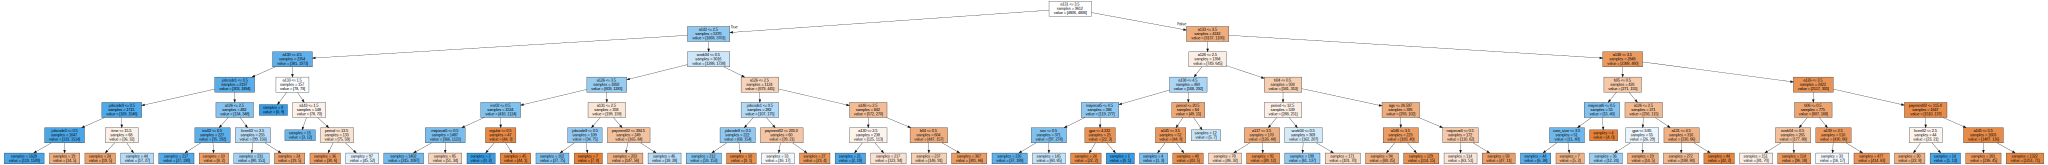

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot",
                feature_names=df.columns[:60], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#### feature importance

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00530684 0.00305934 0.         0.00272027 0.         0.
 0.         0.         0.00816023 0.0153777  0.00175879 0.00193779
 0.         0.00245077 0.06681938 0.         0.         0.0126579
 0.         0.         0.         0.         0.01518907 0.0080133
 0.00514321 0.         0.02503242 0.         0.07929502 0.
 0.         0.0222233  0.42993376 0.08382328 0.         0.
 0.0031753  0.03115218 0.00435131 0.08933269 0.00171497 0.00400168
 0.00874192 0.         0.         0.         0.00245282 0.01945443
 0.00219197 0.         0.01700244 0.         0.0079489  0.
 0.         0.         0.         0.         0.01957702 0.        ]


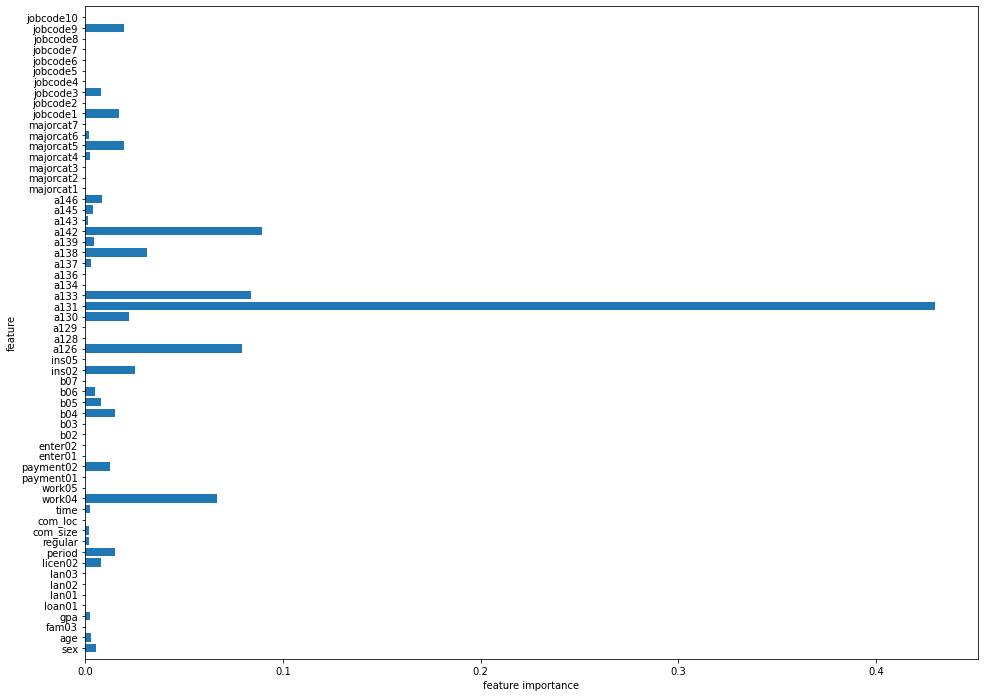

In [ ]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (16,12)
    n_features = len(df.columns[:60]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns[:60])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_wisc(tree)

In [ ]:
res = pd.DataFrame(result)
res["name"] = df.columns[:60]
display(res.info())

display(res.sort_values(by=0,ascending=False).head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   name    60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


None

,0,name
32,0.429934,a131
39,0.089333,a142
33,0.083823,a133
28,0.079295,a126
14,0.066819,work04
37,0.031152,a138
26,0.025032,ins02
31,0.022223,a130
58,0.019577,jobcode9
47,0.019454,majorcat5


### 2-2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=60)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.793


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=60) 
params = {
    'max_depth' : [6, 8],
    'min_samples_split': [8, 16, 20],
    'n_estimators': [100, 200, 400]
}
grid_cv = GridSearchCV(forest, param_grid=params, scoring = 'accuracy', cv=10)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0: .3f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:  0.823
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 400}


#### 평가

In [ ]:
forest = RandomForestClassifier(random_state=60, max_depth=8, min_samples_split = 8, n_estimators = 400 )
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=400,
                       random_state=60)

In [ ]:
print("-----학습용-----")
pred = forest.predict(X_train)
get_eval(y_train, pred, pred)

print("-----시험용-----")
pred = forest.predict(X_test)
get_eval(y_test, pred, pred)

-----학습용-----
오차행렬
[[4169  637]
 [ 644 4162]]
정확도:  0.867, 정밀도:  0.867, 재현율:  0.866, F1:  0.867, AUC:  0.867
-----시험용-----
오차행렬
[[1697  359]
 [ 240  288]]
정확도:  0.768, 정밀도:  0.445, 재현율:  0.545, F1:  0.490, AUC:  0.685


#### feature importance

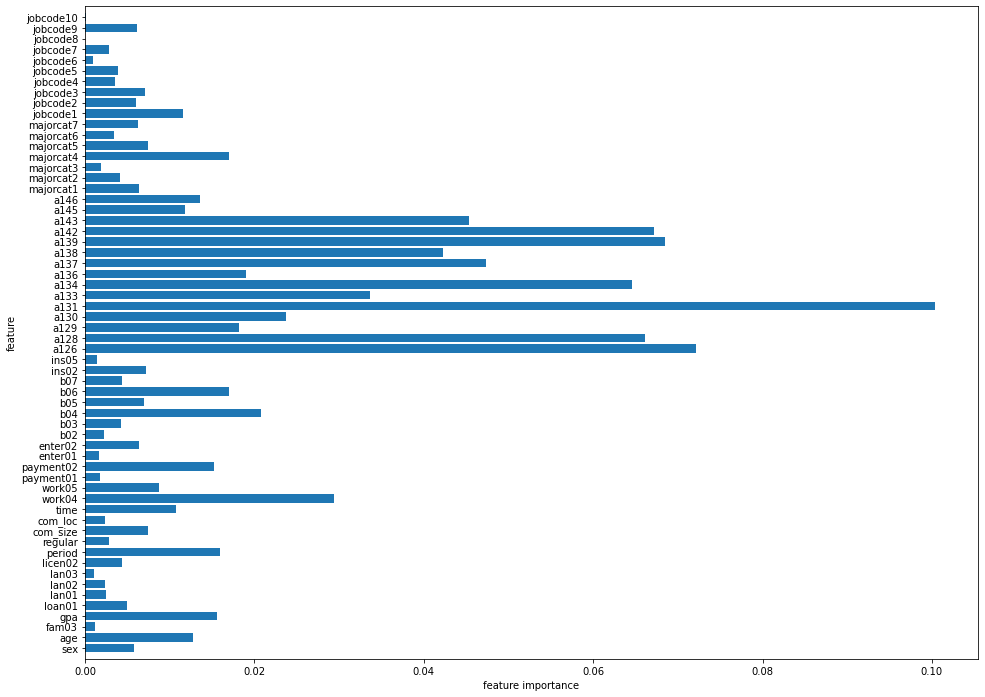

In [ ]:
plot_feature_importances_wisc(forest)

In [ ]:
res = pd.DataFrame(forest.feature_importances_)
res["name"] = df.columns[:60]
display(res.info())

display(res.sort_values(by=0,ascending=False).head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   name    60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


None

,0,name
32,0.100411,a131
28,0.072136,a126
38,0.068543,a139
39,0.067160,a142
29,0.066175,a128
34,0.064581,a134
36,0.047363,a137
40,0.045351,a143
37,0.042299,a138
33,0.033634,a133


In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(5,20):
  dt_scores = cross_val_score(tree, X_train, y_train, cv=i, scoring='accuracy')  
  rf_scores = cross_val_score(forest, X_train, y_train, cv=i, scoring='accuracy')

  print(f"-------cv:{i}")
#  print("Accuracy")
#  print("Decision tree: ", dt_scores) 
#  print("Random forest: ", rf_scores) 

  print("Accuracy mean")
  print("Decision tree :{:.3f}".format(dt_scores.mean())) 
  print("Random forest :{:.3f}".format(rf_scores.mean())) 

In [ ]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=11, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=11, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.65789474 0.64530892 0.70938215 0.83867277 0.83180778 0.83409611
 0.81693364 0.8375286  0.84324943 0.84536082 0.87628866]
Random forest:  [0.6819222  0.66933638 0.73226545 0.86155606 0.89473684 0.86956522
 0.86155606 0.84782609 0.86155606 0.88888889 0.88201604]
Accuracy mean
Decision tree :0.794
Random forest :0.823


#### permutation_importance

In [ ]:
import operator

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(forest, X_train, y_train, n_jobs=-1,random_state = 60)
feature_dict = dict(zip(X.columns, result.importances_mean))
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)

[('a126', 0.01762380357885973),
 ('work04', 0.012879733666250438),
 ('a131', 0.010986267166042386),
 ('a142', 0.0106325426550145),
 ('a134', 0.008343736995422346),
 ('a128', 0.007615480649188444),
 ('a139', 0.007469829379941695),
 ('a143', 0.007365792759051115),
 ('majorcat4', 0.00734498543487303),
 ('b04', 0.007136912193091915),
 ('period', 0.006575114440282914),
 ('jobcode1', 0.006346233874323715),
 ('a138', 0.006200582605076943),
 ('gpa', 0.005867665418227186),
 ('payment02', 0.005659592176446071),
 ('a145', 0.005472326258843063),
 ('b06', 0.0049313358302122134),
 ('a137', 0.00476487723678729),
 ('age', 0.00470245526425297),
 ('time', 0.004244694132334503),
 ('majorcat5', 0.004099042863087776),
 ('a130', 0.004015813566375326),
 ('a133', 0.0039741989180190895),
 ('a146', 0.00387016229712851),
 ('sex', 0.0029130253849354304),
 ('majorcat7', 0.0028922180607573456),
 ('a129', 0.002829796088223002),
 ('a136', 0.002559300873907566),
 ('majorcat1', 0.002455264253017009),
 ('b05', 0.0023512

### 2-3. XGBoost

In [ ]:
xgb_ = XGBClassifier(learning_rate = 0.05, scale_pos_weight=4, early_stopping_rounds = 100)
params = {
    'max_depth' : [4, 6, 8],
    'min_samples_split': [8, 16],
    'n_estimators': [50, 100, 200, 400]
}
grid_cv = GridSearchCV(xgb_, param_grid=params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0: .3f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV 최고 평균 정확도 수치:  0.843
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 400}


In [ ]:
xgb_ = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 8, scale_pos_weight=4,  early_stopping_rounds = 100,min_samples_split = 8)
eval_set = [(X_test, y_test)]
xgb_.fit(X_train, y_train, eval_metric='error', eval_set = eval_set, verbose=True)
w_preds = xgb_.predict(X_test)
w_pred_proba = xgb_.predict_proba(X_test)[:,1]

[0]	validation_0-error:0.263545
[1]	validation_0-error:0.260836
[2]	validation_0-error:0.257353
[3]	validation_0-error:0.263545
[4]	validation_0-error:0.259288
[5]	validation_0-error:0.257353
[6]	validation_0-error:0.259288
[7]	validation_0-error:0.254257
[8]	validation_0-error:0.256192
[9]	validation_0-error:0.25
[10]	validation_0-error:0.245356
[11]	validation_0-error:0.246517
[12]	validation_0-error:0.244969
[13]	validation_0-error:0.248065
[14]	validation_0-error:0.248452
[15]	validation_0-error:0.239164
[16]	validation_0-error:0.237229
[17]	validation_0-error:0.234133
[18]	validation_0-error:0.236842
[19]	validation_0-error:0.234907
[20]	validation_0-error:0.233746
[21]	validation_0-error:0.232198
[22]	validation_0-error:0.230263
[23]	validation_0-error:0.228715
[24]	validation_0-error:0.22678
[25]	validation_0-error:0.227941
[26]	validation_0-error:0.228328
[27]	validation_0-error:0.227554
[28]	validation_0-error:0.229102
[29]	validation_0-error:0.228715
[30]	validation_0-error:0

#### 평가

In [ ]:
#시험용데이터
get_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[1889  167]
 [ 342  186]]
정확도:  0.803, 정밀도:  0.527, 재현율:  0.352, F1:  0.422, AUC:  0.760


In [ ]:
#학습용데이터
tw_preds = xgb_.predict(X_train)
tw_pred_proba = xgb_.predict_proba(X_train)[:,1]

get_eval(y_train, tw_preds, tw_pred_proba)

오차행렬
[[4806    0]
 [  21 4785]]
정확도:  0.998, 정밀도:  1.000, 재현율:  0.996, F1:  0.998, AUC:  1.000


#### feature importance

In [ ]:
xgb_.get_booster().get_score(importance_type="gain")

{'a126': 12.170443914165812,
 'a128': 8.669558472208307,
 'a129': 2.9742615378823443,
 'a130': 3.735487665780554,
 'a131': 29.54231745057319,
 'a133': 4.653937221820231,
 'a134': 12.997503737491266,
 'a136': 3.265333071993642,
 'a137': 3.74581261334822,
 'a138': 6.606866939624599,
 'a139': 8.87498618636957,
 'a142': 12.253248526044679,
 'a143': 4.812405009836359,
 'a145': 5.614811002787781,
 'a146': 3.6663125575715454,
 'age': 2.840064471908059,
 'b02': 3.9766741725179107,
 'b03': 2.947905641812342,
 'b04': 7.859124369205225,
 'b05': 3.74872412142702,
 'b06': 6.980522189776865,
 'b07': 3.6681493622084753,
 'com_loc': 2.870980568779162,
 'com_size': 3.1245240453445495,
 'enter01': 3.5920138868404092,
 'enter02': 5.349263225655493,
 'fam03': 2.3025861808170736,
 'gpa': 3.4210100160744252,
 'ins02': 15.538080558111798,
 'ins05': 2.7240731154805204,
 'jobcode1': 8.048916745231775,
 'jobcode10': 2.1127388474,
 'jobcode2': 8.03138081021748,
 'jobcode3': 11.470612328165215,
 'jobcode4': 15.78

### 2-4. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 60)

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_Rate=0.05)

eval_set = [(X_tr,y_tr), (X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_set = eval_set, eval_metric="error",verbose=1)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_error: 0.195607	training's binary_logloss: 0.652523	valid_1's binary_error: 0.233888	valid_1's binary_logloss: 0.6581
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.191329	training's binary_logloss: 0.618836	valid_1's binary_error: 0.234927	valid_1's binary_logloss: 0.628674
[3]	training's binary_error: 0.187861	training's binary_logloss: 0.590287	valid_1's binary_error: 0.230769	valid_1's binary_logloss: 0.604244
[4]	training's binary_error: 0.184277	training's binary_logloss: 0.565261	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.581413
[5]	training's binary_error: 0.176994	training's binary_logloss: 0.540888	valid_1's binary_error: 0.224532	valid_1's binary_logloss: 0.561681
[6]	training's binary_error: 0.173526	training's binary_logloss: 0.521201	valid_1's binary_error: 0.22973	valid_1's binary_logloss: 0.545238
[7]	training's binary_error: 0.167399	training's binary_logloss: 0.503664	valid_1's binar

#### 평가

In [ ]:
#시험용데이터
get_eval(y_test, preds, pred_proba)

오차행렬
[[1859  197]
 [ 329  199]]
정확도:  0.796, 정밀도:  0.503, 재현율:  0.377, F1:  0.431, AUC:  0.766


In [ ]:
# 학습용데이터
tpreds = lgbm_wrapper.predict(X_train)
tpred_proba = lgbm_wrapper.predict_proba(X_train)[:,1]
get_eval(y_train, tpreds, tpred_proba)

오차행렬
[[4729   77]
 [ 373 4433]]
정확도:  0.953, 정밀도:  0.983, 재현율:  0.922, F1:  0.952, AUC:  0.990


#### feature importance

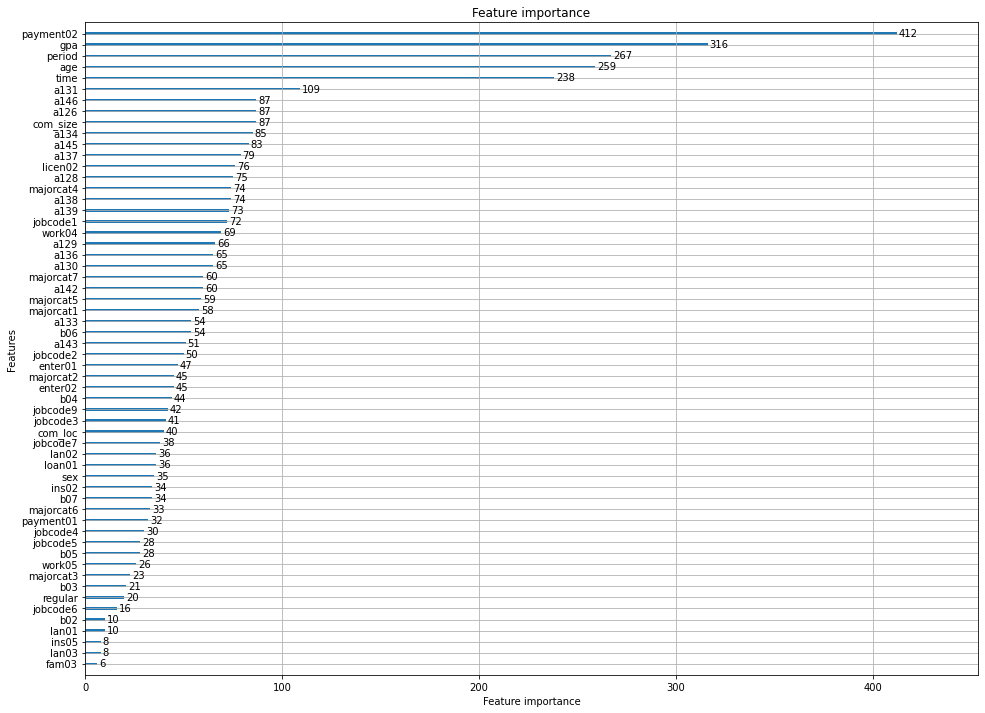

In [ ]:
from lightgbm import plot_importance

plot_importance(lgbm_wrapper)